# **Task_3 :  Data Science intern (Oasis Infobyte)**
# Project Name: **Car_Price_Prediction**
# Author: Avinash Jamdade


**CAR PRICE PREDICTION WITH MACHINE LEARNING**
* The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more.
* Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

**Import Modules**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('/content/car data.csv')

In [49]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0



* **Data Checks to Perform**

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of the dataset
* Check various categories present in the different categorical columns

In [50]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [51]:
# checking the number of rows and columns
df.shape

(301, 9)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [53]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [54]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [55]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [56]:
# Check Duplication
df.duplicated().sum()

2

In [57]:
df.drop_duplicates(keep ='first', inplace = True)

In [58]:
#Check datatype
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [59]:
# Check the number of unique values of each column
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

# EDA

In [60]:
df['Owner'].value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

From above we can detect a single car owned by how many members and we found that there is 10 snigle owned cars,1 car is owned by 3 owners and 290 cars have no owner

In [61]:
#Exploring Categorical Features
df['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [62]:

import matplotlib.pyplot as plt
import seaborn as sns
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

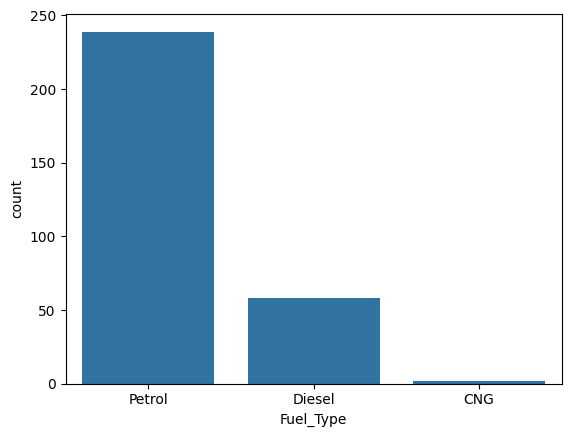

In [63]:
sns.countplot(x='Fuel_Type', data=df)
plt.show()

In [64]:
df['Selling_type'].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

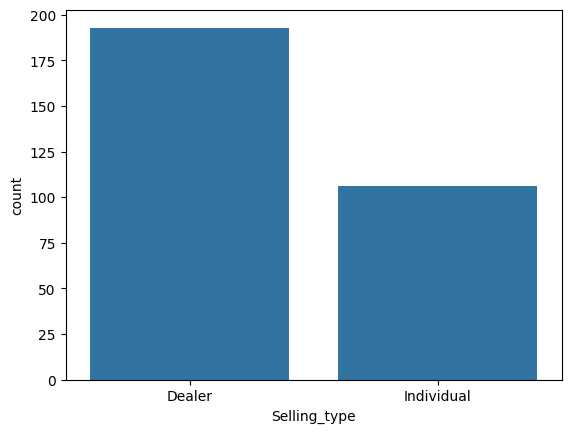

In [65]:
sns.countplot(x='Selling_type', data=df)
plt.show()

In [66]:
df['Transmission'].value_counts()


Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

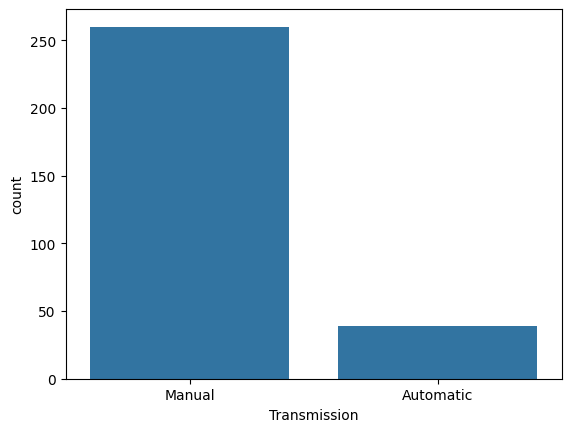

In [67]:
sns.countplot(x='Transmission', data=df)
plt.show()

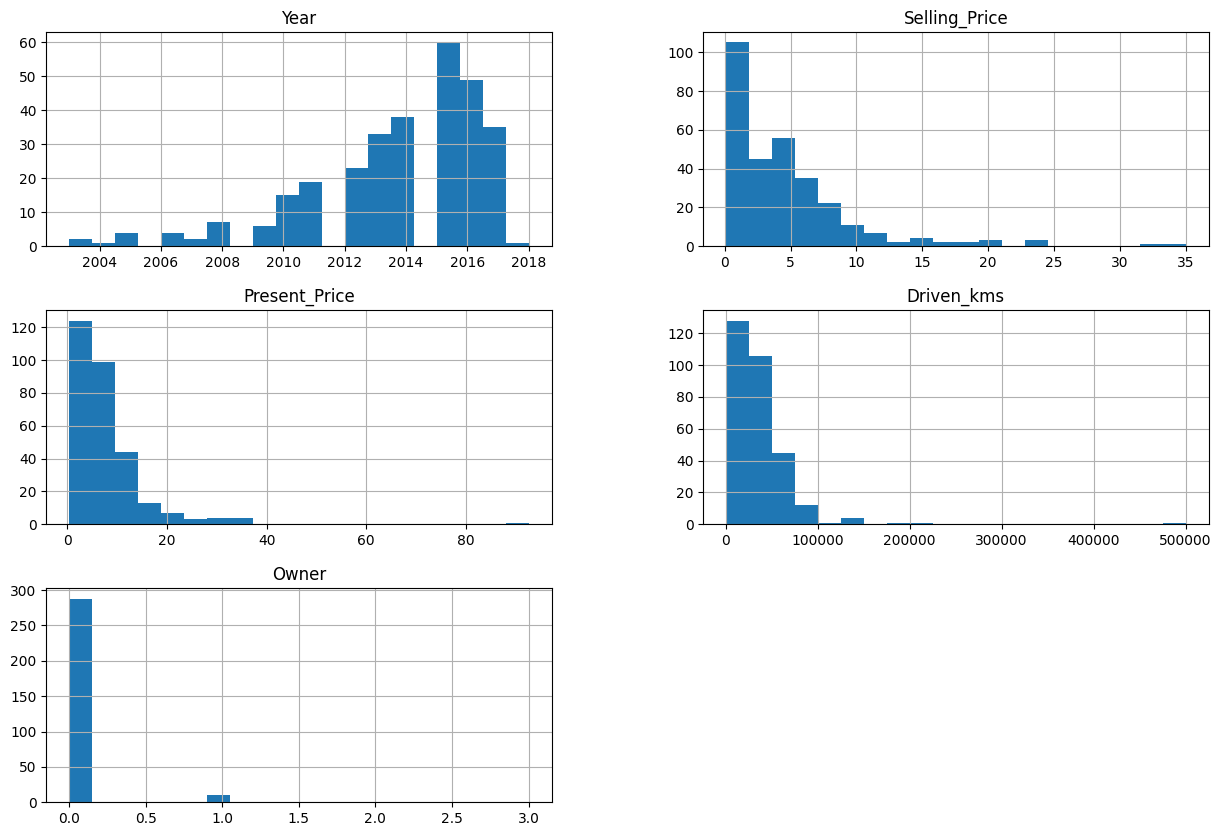

In [68]:
#Exploring Numerical features
df.hist(bins=20, figsize=(15, 10))
plt.show()


Simply Histogram of our different numerical features shows us the distribution density

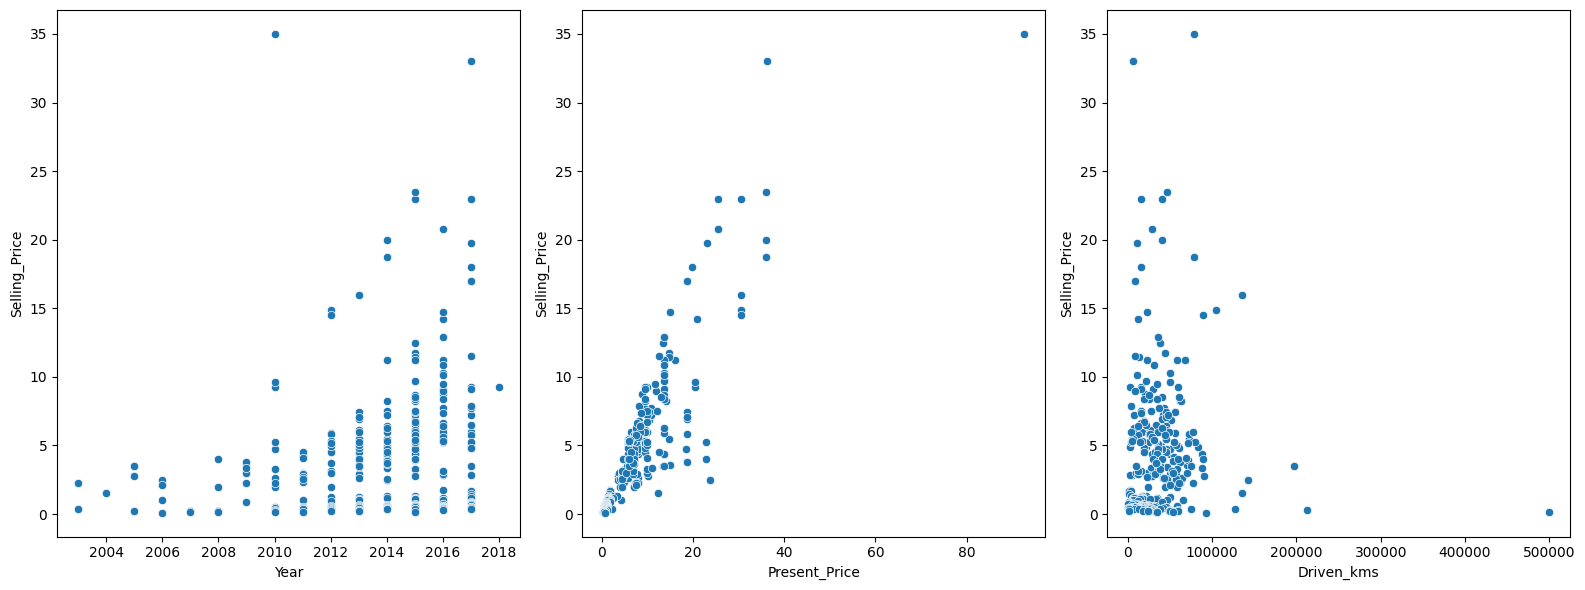

In [69]:
#Finding relationships between different numerical features and our target features
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.subplot(1, 3, 3)
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.tight_layout()
plt.show()

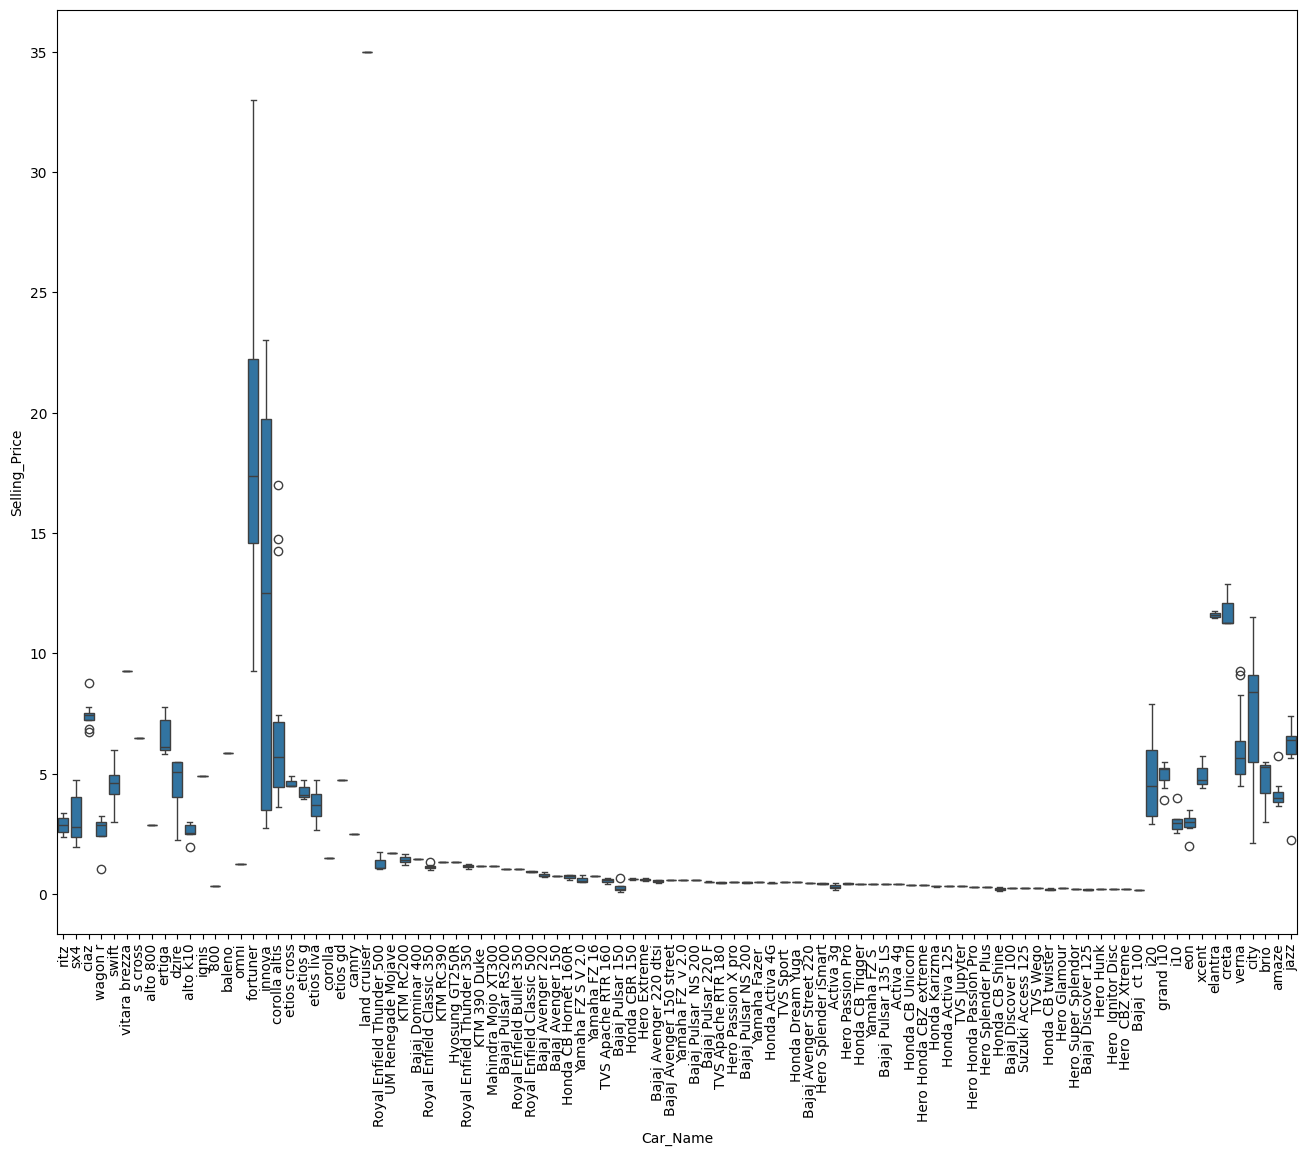

In [70]:
#Finding Relationship between Cars and it's Selling price using BOXPlot
plt.figure(figsize=(16,12))
sns.boxplot(x='Car_Name', y='Selling_Price', data=df)
plt.xticks(rotation=90)
plt.show()

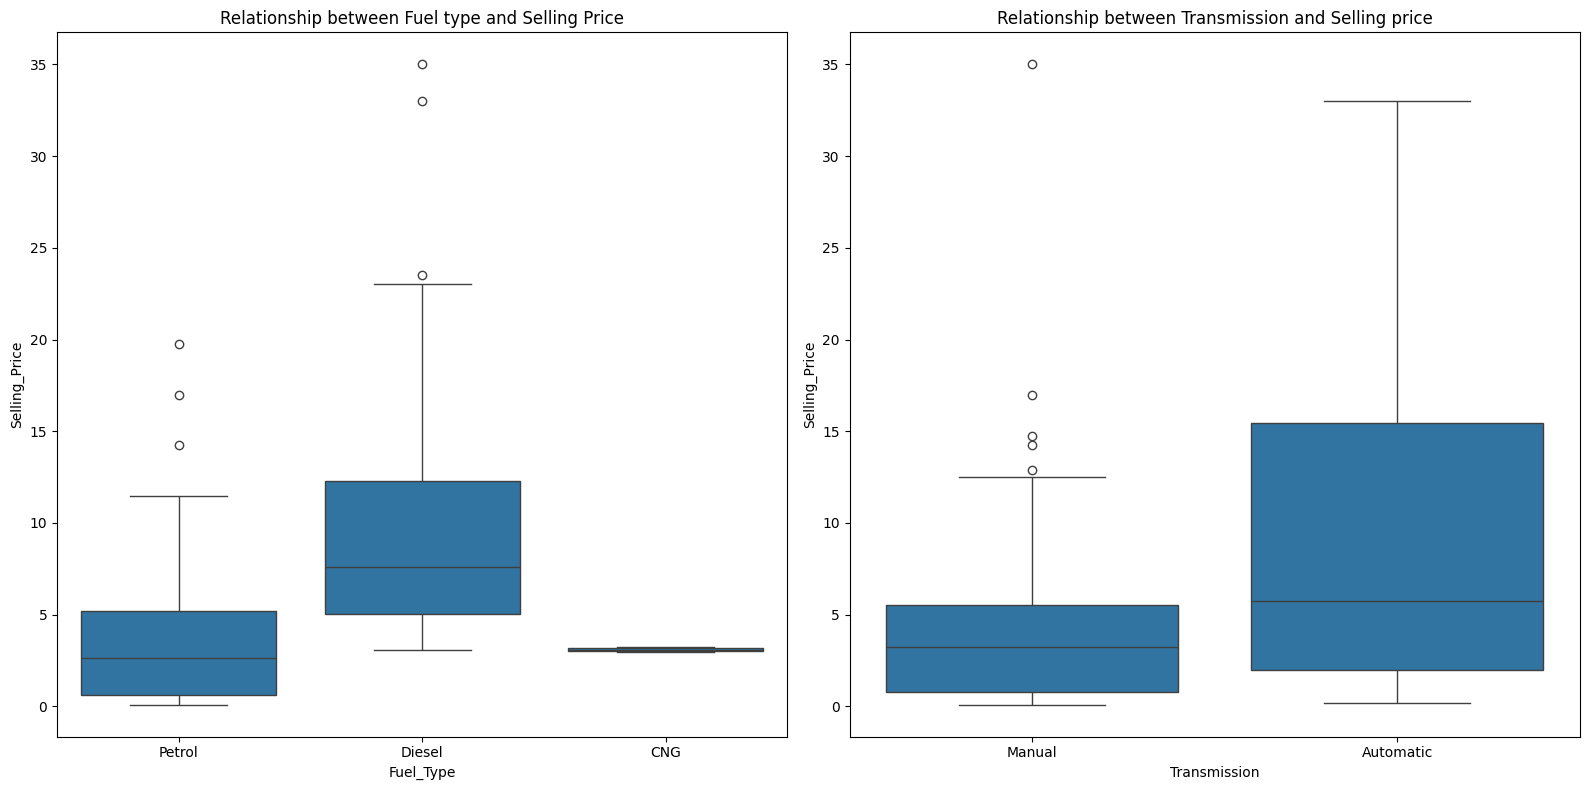

In [71]:

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Relationship between Fuel type and Selling Price')
plt.subplot(1, 2, 2)
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Relationship between Transmission and Selling price')
plt.tight_layout()
plt.show()


# Model Building

In [72]:
#Split the datset into features
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [73]:
# One-hot encoding categorical values into numerical values
X_encoded = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission','Car_Name'], prefix=['Fuel', 'Selling', 'Transmission','Cars'])


In [74]:
X_encoded

,Year,Present_Price,Driven_kms,Owner,Fuel_CNG,Fuel_Diesel,Fuel_Petrol,Selling_Dealer,Selling_Individual,Transmission_Automatic,...,Cars_land cruiser,Cars_omni,Cars_ritz,Cars_s cross,Cars_swift,Cars_sx4,Cars_verna,Cars_vitara brezza,Cars_wagon r,Cars_xcent
0,2014,5.59,27000,0,False,False,True,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2013,9.54,43000,0,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2017,9.85,6900,0,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2011,4.15,5200,0,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2014,6.87,42450,0,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
297,2015,5.90,60000,0,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
298,2009,11.00,87934,0,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
299,2017,12.50,9000,0,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [76]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [77]:
#Train a Regression Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred_linear = linear_model.predict(X_test)

In [79]:
#Evaluating the Regression Model
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = sqrt(mse_linear)
print(f'Linear Regression RMSE: {rmse_linear}')

Linear Regression RMSE: 2.653277535899307


In [80]:
#Train a Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [81]:
y_pred_rf = rf_model.predict(X_test)

In [82]:
#Evaluating the Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
print(f'Random Forest RMSE: {rmse_rf}')

Random Forest RMSE: 3.249616937912324


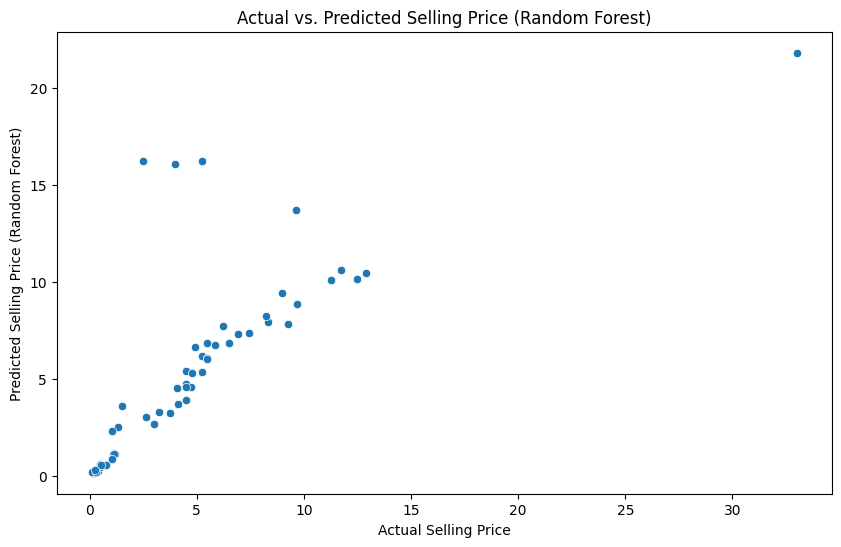

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price (Random Forest)')
plt.title('Actual vs. Predicted Selling Price (Random Forest)')
plt.show()

The scatter plot above shows closely clustered data points, indicating effective performance of our model.